Vamos utilizar algumas funções do arquivo planar_utils para nos auxiliar 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model
from sklearn.neural_network import MLPClassifier

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

Vamos carregar o conjunto de dados no qual trabalharemos. O código abaixo o carregará nas variáveis X e Y

In [2]:
X, Y = load_planar_dataset()
Y = Y[0] #neste dataset Y tem uma dimensao a mais, vamos remove-la
X.shape

(2, 400)

Observe que nossa base de dados contém duas características (X1 e X2) e o rótulo (vermelho:0 e roxo:1)

Vamos plotá-lo

In [3]:
%matplotlib inline

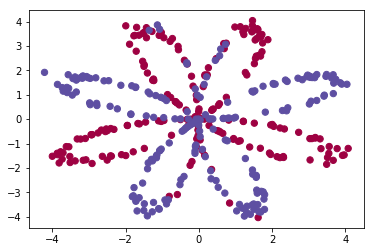

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Observe que este problema é bastante complexo para conseguirmos separar os pontos azuis dos vermelhos com apenas uma linha, como faríamos com um modelo linear simples. Apenas como observação, vamos tentar empregar uma regressão logística:

In [5]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Taxa de acerto da Regressão Logística: 0.460000 


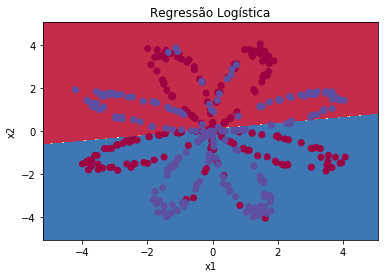

In [6]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Regressão Logística")

LR_predictions = clf.predict(X.T)
print ('Taxa de acerto da Regressão Logística: %f ' % float(np.mean(LR_predictions == Y[0])))

Para casos como este precisamos de modelos mais complexos, com superfícies de decisões não lineares. Como as Redes Neurais podem ser vistas com o um conjunto de funções não linearmente combinadas, elas nos possibilitam obter superfícies mais complexas

Vamos treinar o modelo Neural abaixo para vermos se obtemos um resultado melhor

<img src="imagens/simple_nn.png" width="500">

Matematicamente, para um exemplo $x^{(i)}$ temos:

$
z^{[1](i)}=W^{[1]}x^{[1](i)}+b^{[1](i)}\\
a^{[1](i)} = tanh(z^{[1](i)})\\
z^{[2](i)} = W^{[2]}a^{[1](i)}+b^{[2](i)}\\
\hat{y }^{(i)} = a^{[2](i)} = \sigma(z^{[2](i)})\\
\begin{equation}
  y^{(i)}_{predito} ==\left\{
  \begin{array}{@{}ll@{}}
    0, & \text{se}\ a^{[2](i)} > 0.5\\
    1, & \text{caso contrário}
  \end{array}\right.
\end{equation} 
\tag{1}$

Dado os valores preditos, podemos calcular a função de custo por:

$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large \right) \small \tag{2}$

O Scikit-learn nos oferece um pacote para trabalharmos com redes Perceptron, para isso definimos a arquitetura da rede como:

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(4, 1), activation='tanh', random_state=42)

In [8]:
clf.fit(X.T, Y.T)

/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Taxa de acerto da Rede Neural: 0.510000 


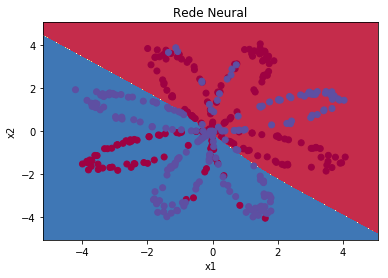

In [9]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Observe que com este modelo conseguimos construir uma superfície de decisão um pouco "curva" no espaço $R^2$, já que não estamos mais trabalhando com modelos lineares. Com isso aumentamos nossa taxa de acerto

Vamos tentar modelos mais complexos para observarmos esse comportamento

/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Taxa de acerto da Rede Neural: 0.552500 


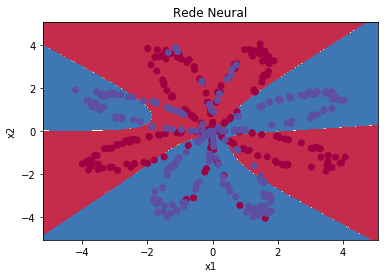

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(4, 4), activation='tanh', random_state=42)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Um hiper parâmetro muito importante a ser configurado em um NN é o learning_rate. Caso ele seja muito baixo, a rede necessitará de muitas interações para convergir (muitas vezes milões), o que inviabiliza o projeto. Porém, se ele for muito alto pode haver um "salto" do mínimo da função pelo gradiente, impossibilitando a convergência do modelo.

<img src="imagens/sgd.gif">

<img src="imagens/sgd_bad.gif">

Vamos testar no nosso exemplo:

Taxa de acerto da Rede Neural: 0.385000 


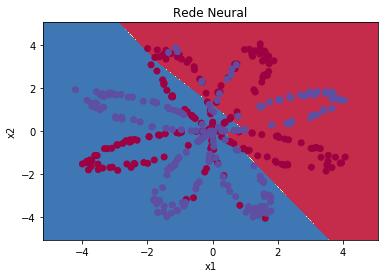

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(4, 4), activation='tanh', random_state=42, learning_rate_init=10.0)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Observe que mesmo utilizando um modelo mais complexo, a nossa rede não conseguiu convergir para o mínimo de erro

Taxa de acerto da Rede Neural: 0.640000 


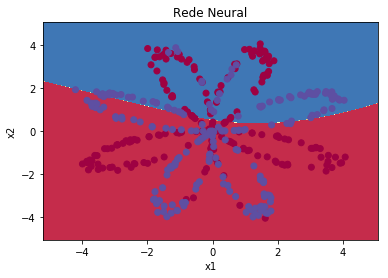

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(4, 4), activation='tanh', random_state=42, learning_rate_init=0.00001)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

O mesmo acontece com uma learning rate muito baixa

/home/felipe/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Taxa de acerto da Rede Neural: 0.525000 


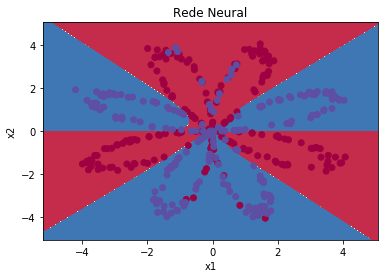

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(4, 4), activation='tanh', random_state=42, learning_rate_init=0.003)
clf.fit(X.T, Y.T)
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Rede Neural")

NN_predictions = clf.predict(X.T)
print ('Taxa de acerto da Rede Neural: %f ' % float(np.mean(NN_predictions == Y[0])))

Por fim, uma learning rate adequada resulta em um modelo mais preciso

E para prevermos um valor:

In [14]:
clf.predict([[2.5, 0.75]])

array([1], dtype=uint8)

Assim, nosso ponto $(2.5, 0.75)$ é da classe roxo (ou azul)

In [15]:
clf.predict_proba([[2.5, 0.75]])

array([[0.32304657, 0.67695343]])

A probabilidade para a classe vermelha é 0.32 e para a roxa 0.68